In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [3]:
font_s = 15
font_w = "bold"
    
def plot_histogram(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.ylim(0,2000)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    sns.histplot(data=df, x=score, kde=True, bins=bin_range)
    plt.xticks([-0.55,0,1,2,3,5,10,20,31,40,61,100,300,1000,2000], fontsize = 12)
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'reference: {reference}, query: {query}, window: {window}')
    plt.xlabel(score, fontsize = font_s)
    plt.ylabel('Count', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

In [4]:
reference = 'symattis'
query = 'symattis_D'
window = '50000'
chromosome='chr6A'
# path=f'/Volumes/quirozj/00_kmers/read_depth/01_IBS_output/{reference}/'
# path=f'/Volumes/quirozj/09_watseq/01_IBSpy_output/{reference}/'
# path=f'/Volumes/quirozj/00_kmers/pangenome/01_IBS_output/{reference}/'
path=f'/Volumes/quirozj/00_kmers/subgenome/01_IBS_output/{reference}/'
path


'/Volumes/quirozj/00_kmers/subgenome/01_IBS_output/symattis/'

In [5]:
in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
# '/Volumes/quirozj/09_watseq/01_IBSpy_output'
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49846,29797,583,15750
1,chr1A,49969,99969,49793,23926,646,18146
2,chr1A,99938,149938,49556,16147,590,27550
3,chr1A,149907,199907,49797,24072,712,19138
4,chr1A,199876,249876,49483,29153,691,14686
...,...,...,...,...,...,...,...
299299,chrUn,956606536,956656536,27834,26256,99,1841
299300,chrUn,956656505,956706505,27783,25772,115,2358
299301,chrUn,956706474,956756474,27702,26458,82,1684
299302,chrUn,956756443,956806443,27733,24979,134,2351


## Observed k-mers

In [6]:
score = 'observed_kmers'

In [7]:
in_file['observed_kmers'] = in_file['observed_kmers']/in_file['total_kmers']*100
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49846,59.778117,583,15750
1,chr1A,49969,99969,49793,48.050931,646,18146
2,chr1A,99938,149938,49556,32.583340,590,27550
3,chr1A,149907,199907,49797,48.340261,712,19138
4,chr1A,199876,249876,49483,58.915183,691,14686
...,...,...,...,...,...,...,...
299299,chrUn,956606536,956656536,27834,94.330675,99,1841
299300,chrUn,956656505,956706505,27783,92.761761,115,2358
299301,chrUn,956706474,956756474,27702,95.509350,82,1684
299302,chrUn,956756443,956806443,27733,90.069592,134,2351


In [8]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/60),2)
    
    font_s = 10
    fig=plt.figure(figsize=fig_size, facecolor='w')
#     plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=5, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Observed k-mers (%)', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp) {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.yticks(list(np.arange(98,100.22,0.22)), fontsize = font_s)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,800,100)), fontsize = font_s)
    plt.ylim(98, 100.2)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

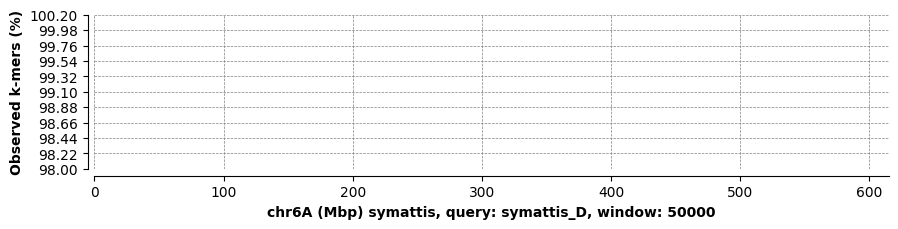

In [9]:
fig_size=(25, 5)

by_chr_df = in_file[in_file['seqname'].str.contains(chromosome)]
chromosomes = by_chr_df['seqname'].unique().tolist()

# chromosomes=['chr']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

# Variations

In [10]:
score = 'variations'
# in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
# in_file

In [11]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/60),2)
    
    font_s = 10
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=5, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Variations', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp) {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.yticks([0,2,10, 30, 120,350, 1000], fontsize = font_s)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,1000,100)), fontsize = font_s)
#     plt.ylim(0,1500)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

/var/folders/x6/wm6w59m54v5518frzs6xldbr000cws/T/ipykernel_6146/2583868339.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=fig_size, facecolor='w')


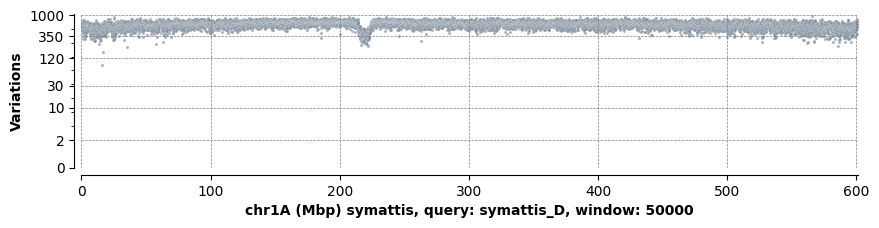

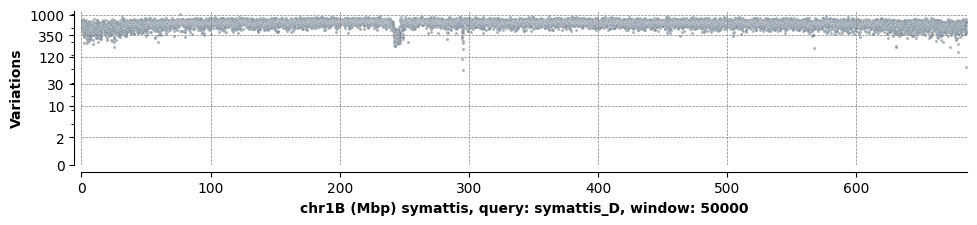

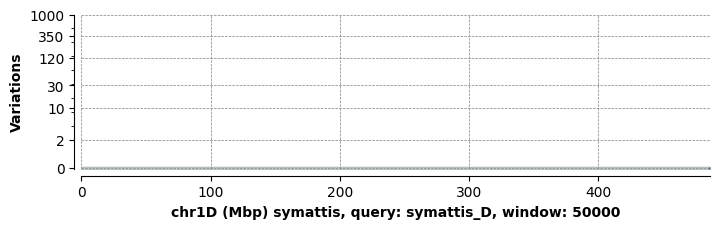

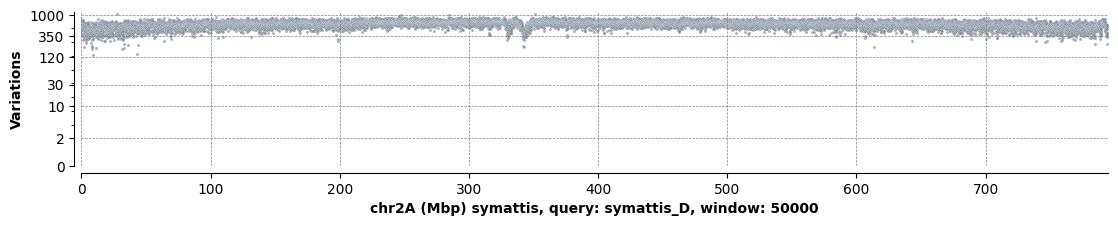

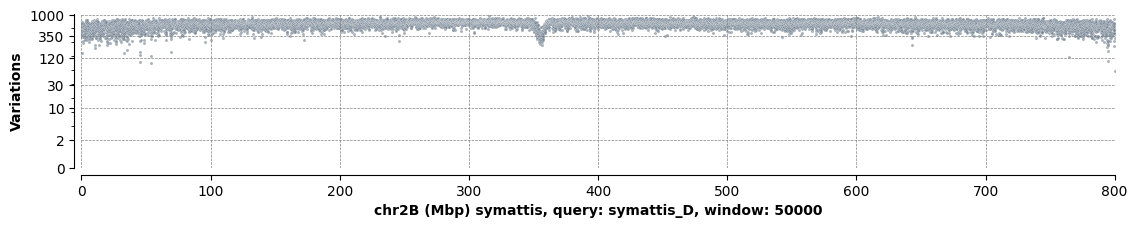

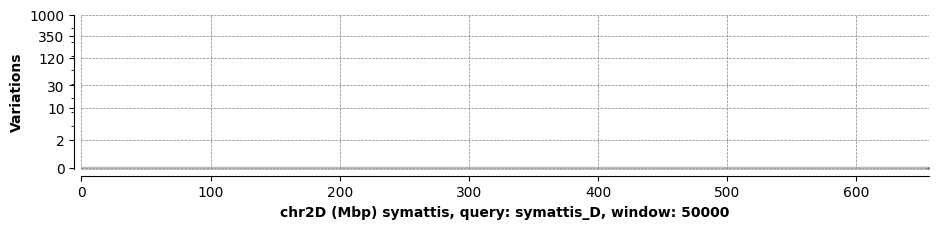

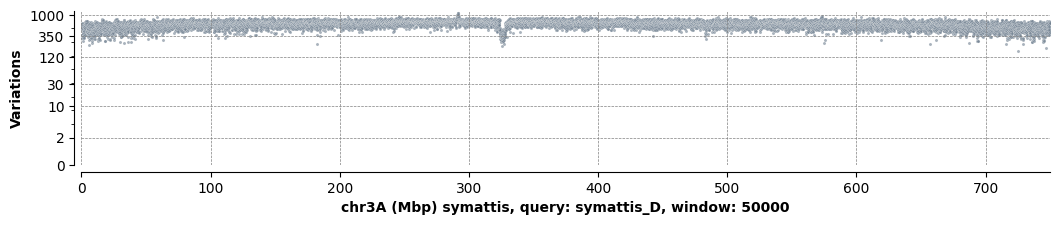

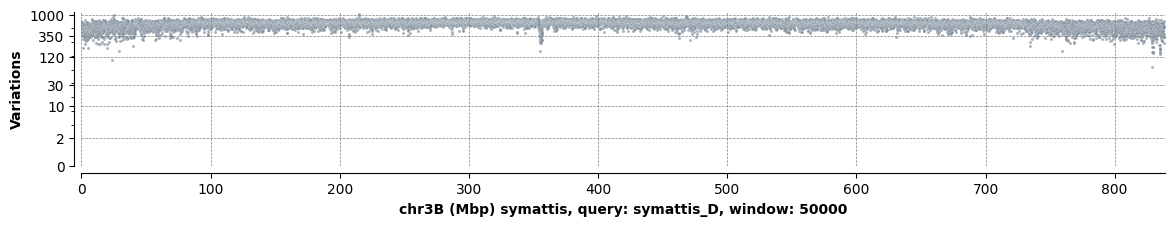

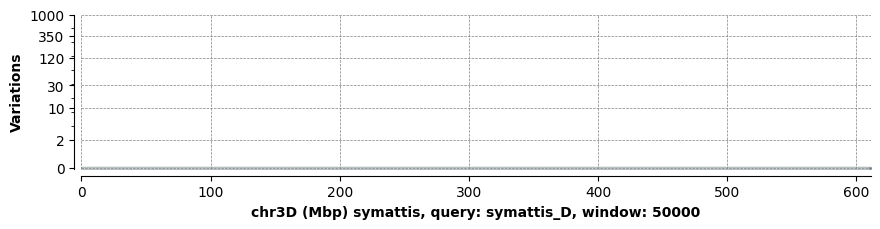

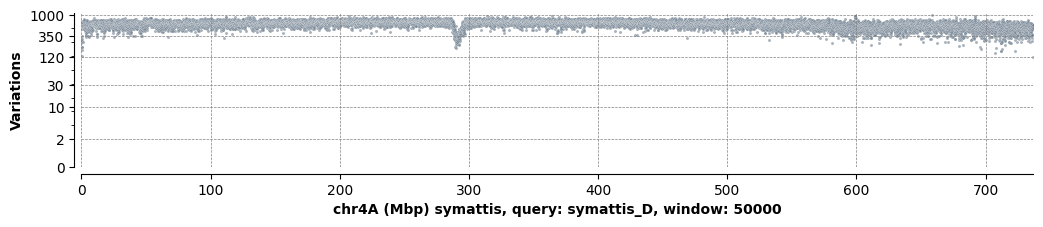

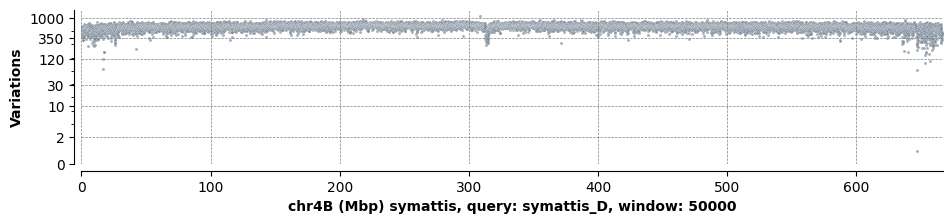

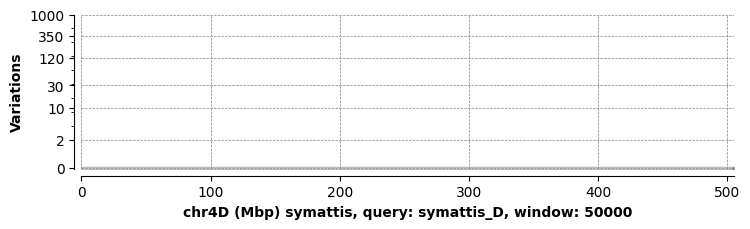

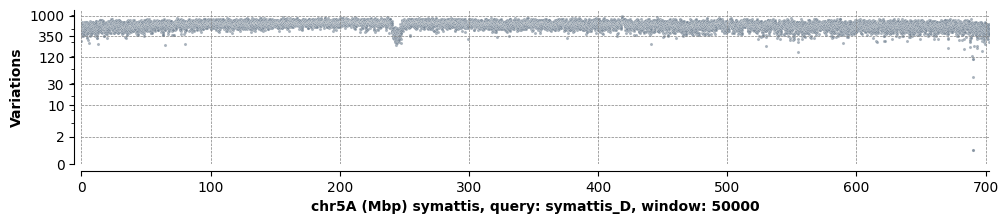

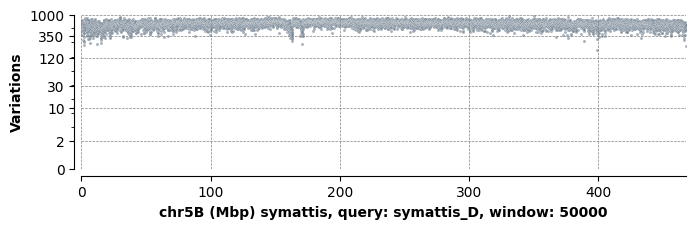

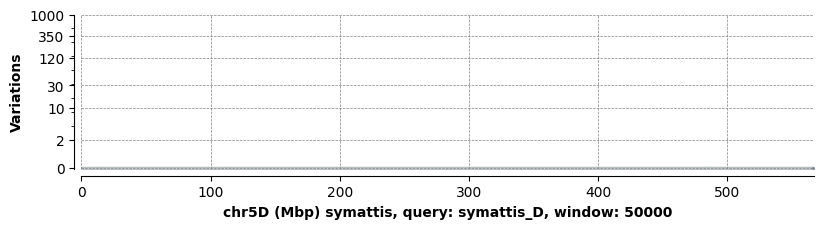

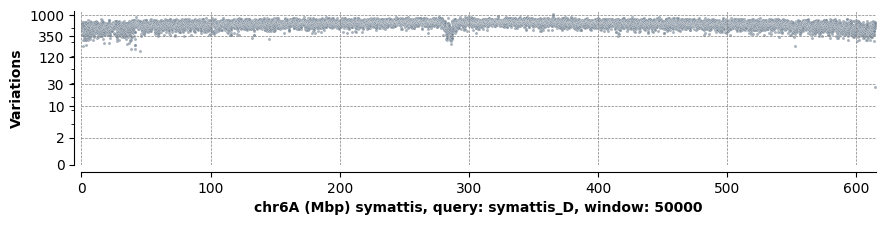

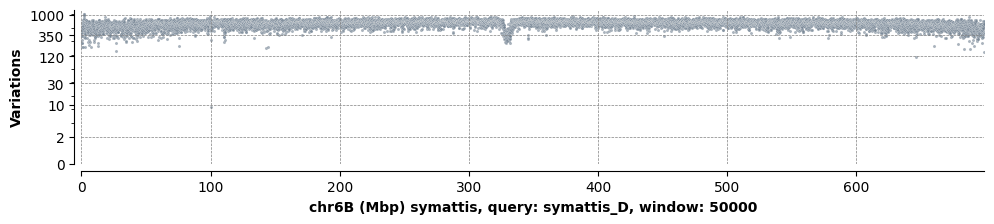

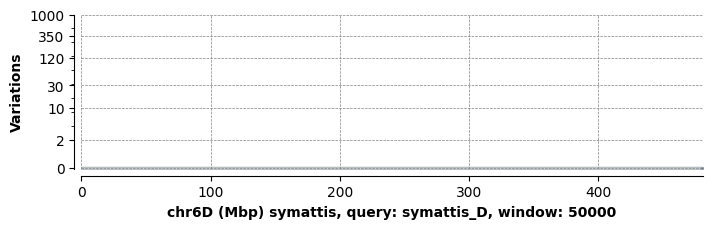

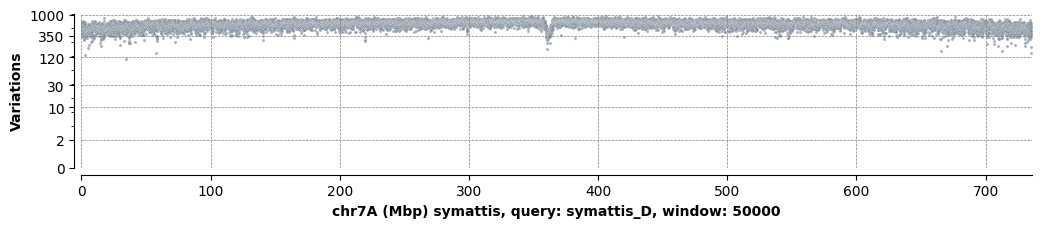

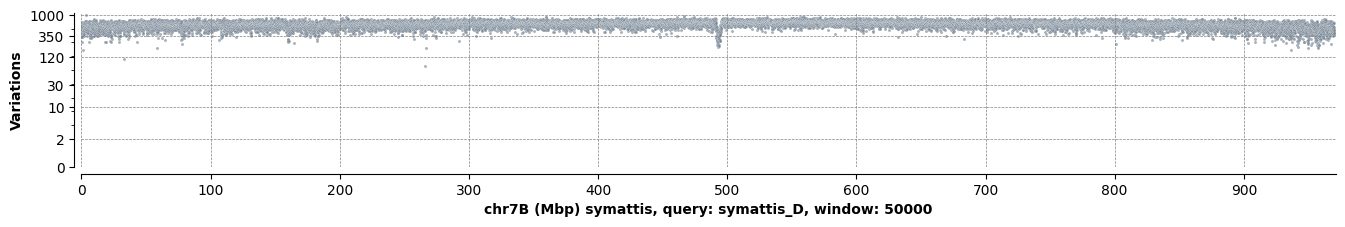

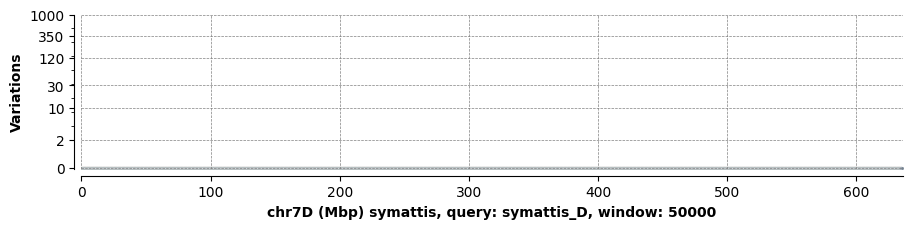

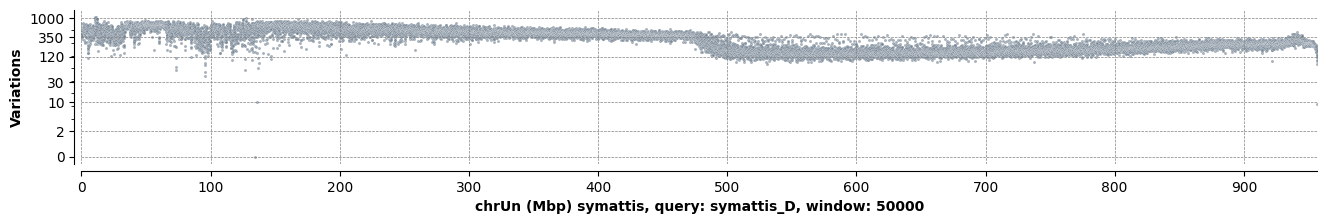

In [12]:
fig_size=(10, 1.8)
by_chr_df = in_file[in_file['seqname'].str.contains(chromosome)]
chromosomes = by_chr_df['seqname'].unique().tolist()
chromosomes = in_file['seqname'].unique().tolist()

# chromosomes=['chr']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

In [13]:
font_s = 10
font_w = "bold"

def plot_histogram_by_chr(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.ylim(0,200)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    ax = sns.histplot(data=df, x=score, kde=False, bins=bin_range, hue="seqname", element="step",legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(0.1, 1), title=None, fontsize = 8)
    plt.xticks([-0.55,0,1,2,3,5,10,20,30,50,120,350,1000,2000], fontsize = font_s)
    plt.xlim(-0.55,2000)
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'reference: {reference}, query: {query}, window: {window}', fontsize = 9)
    plt.xlabel(score + f', {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.ylabel('Frequency', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

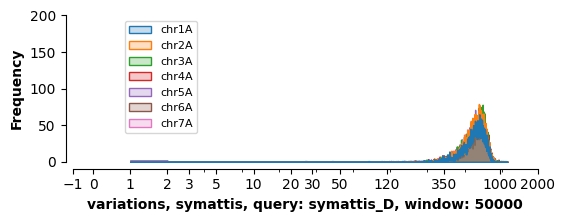

In [16]:
fig_size=(6, 1.9)
by_chr_df = in_file[in_file['seqname'].str.contains('A')]
plot_histogram_by_chr(by_chr_df, fig_size, score, reference, query, window)